# Covid19

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [0]:
Case = pd.read_csv('/content/drive/My Drive/covid/Case.csv')
PatientInfo = pd.read_csv('/content/drive/My Drive/covid/PatientInfo.csv')
PatientRoute = pd.read_csv('/content/drive/My Drive/covid/PatientRoute.csv')
Region = pd.read_csv('/content/drive/My Drive/covid/Region.csv')
SearchTrend = pd.read_csv('/content/drive/My Drive/covid/SearchTrend.csv')
SeoulFloating = pd.read_csv('/content/drive/My Drive/covid/SeoulFloating.csv')
Time = pd.read_csv('/content/drive/My Drive/covid/Time.csv')
TimeAge = pd.read_csv('/content/drive/My Drive/covid/TimeAge.csv')
TimeGender = pd.read_csv('/content/drive/My Drive/covid/TimeGender.csv')
TimeProvince = pd.read_csv('/content/drive/My Drive/covid/TimeProvince.csv')
Weather = pd.read_csv('/content/drive/My Drive/covid/Weather.csv')

## Case

In [0]:
Case

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006
...,...,...,...,...,...,...,...,...
76,6100004,Gyeongsangnam-do,Changwon-si,True,Hanmaeum Changwon Hospital,7,35.22115,128.6866
77,6100005,Gyeongsangnam-do,Changnyeong-gun,True,Changnyeong Coin Karaoke,7,35.54127,128.5008
78,6100006,Gyeongsangnam-do,from other city,True,Onchun Church,2,-,-
79,6100007,Gyeongsangnam-do,-,False,etc,19,-,-


In [0]:
Case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
case_id           81 non-null int64
province          81 non-null object
city              81 non-null object
group             81 non-null bool
infection_case    81 non-null object
confirmed         81 non-null int64
latitude          81 non-null object
longitude         81 non-null object
dtypes: bool(1), int64(2), object(5)
memory usage: 4.6+ KB


In [43]:
Case.isna().sum()

case_id           0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

In [45]:
Case.replace('-', np.NaN).isna().sum()

case_id            0
province           0
city              30
group              0
infection_case     0
confirmed          0
latitude          52
longitude         52
dtype: int64

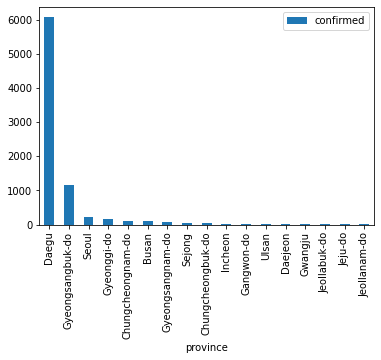

In [0]:
df_Case = Case[['confirmed', 'province']].groupby('province').sum().sort_values(by = 'confirmed', ascending = False)
df_Case.plot(kind = 'bar')

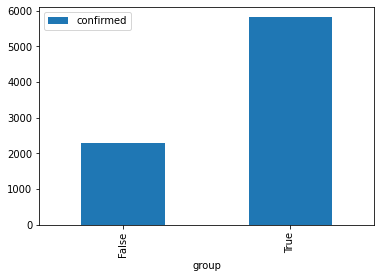

In [47]:
Case[['confirmed', 'group']].groupby('group').sum().plot(kind = 'bar')

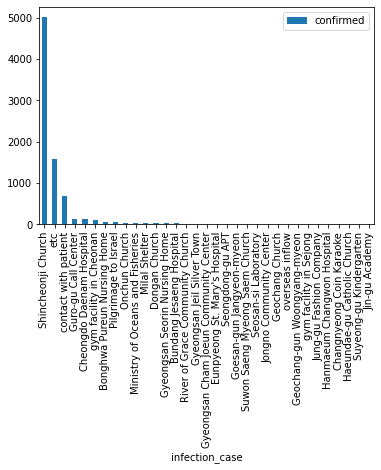

In [51]:
df_infection_case = Case[['confirmed', 'infection_case']]\
                        .groupby('infection_case').sum()\
                        .sort_values(by = 'confirmed', ascending = False)
df_infection_case.plot(kind = 'bar')

In [0]:
province = Case.province.unique()

In [0]:
names = ['서울', '부산', '대구', '광주', '인천', '대전',
         '울산', '세종', '경기도', '강원도', '충청북도',
         '충청남도', '전라북도', '전라남도', '경상북도',
         '경상남도', '제주도']

In [0]:
names = dict(zip(province, names))

## PatientInfo

In [33]:
PatientInfo

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,6100000085,NaN,male,1990.0,30s,Korea,Gyeongsangnam-do,Changwon-si,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-16,NaN,NaN,NaN
2239,7000000001,139.0,male,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,87.0,NaN,2020-02-20,NaN,NaN,isolated
2240,7000000002,222.0,female,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,84.0,NaN,2020-02-22,2020-03-07,NaN,released
2241,7000000003,4345.0,female,1972.0,40s,Korea,Jeju-do,etc,NaN,etc,NaN,NaN,21.0,NaN,2020-03-02,2020-03-15,NaN,released


In [34]:
PatientInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 18 columns):
patient_id            2243 non-null int64
global_num            1337 non-null float64
sex                   2147 non-null object
birth_year            1789 non-null float64
age                   1985 non-null object
country               2243 non-null object
province              2243 non-null object
city                  2176 non-null object
disease               19 non-null object
infection_case        1193 non-null object
infection_order       42 non-null float64
infected_by           475 non-null float64
contact_number        413 non-null float64
symptom_onset_date    194 non-null object
confirmed_date        2098 non-null object
released_date         233 non-null object
deceased_date         30 non-null object
state                 2147 non-null object
dtypes: float64(5), int64(1), object(12)
memory usage: 315.5+ KB


In [53]:
PatientInfo.isna().sum()

patient_id               0
global_num             906
sex                     96
birth_year             454
age                    258
country                  0
province                 0
city                    67
disease               2224
infection_case        1050
infection_order       2201
infected_by           1768
contact_number        1830
symptom_onset_date    2049
confirmed_date         145
released_date         2010
deceased_date         2213
state                   96
dtype: int64

In [0]:
def make_bar(df, var, unique):
    df = df\
        .groupby(var)[unique]\
        .count().reset_index().sort_values(unique, ascending = False)
    ax = plt.subplots(figsize = (12, 12))
    g = sns.barplot(df[var], df[unique])
    plt.ylabel('Count')
    g.set_xticklabels(g.get_xticklabels(), rotation = 90)

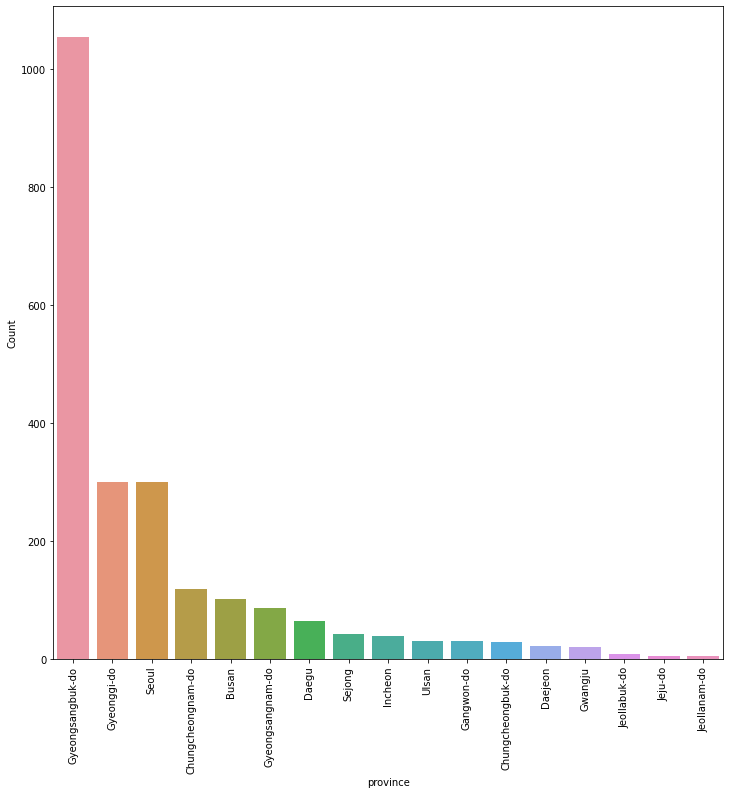

In [87]:
make_bar(PatientInfo, 'province', 'patient_id')

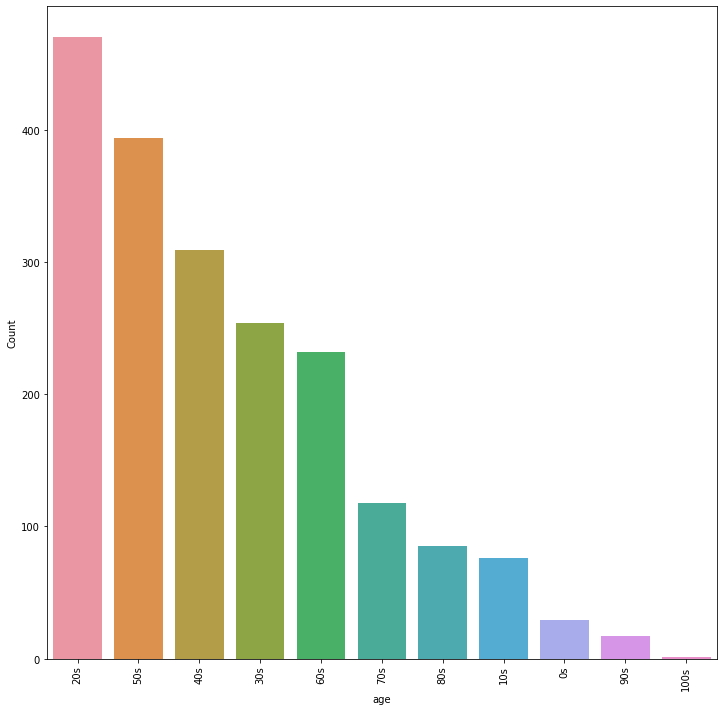

In [88]:
make_bar(PatientInfo, 'age', 'patient_id')

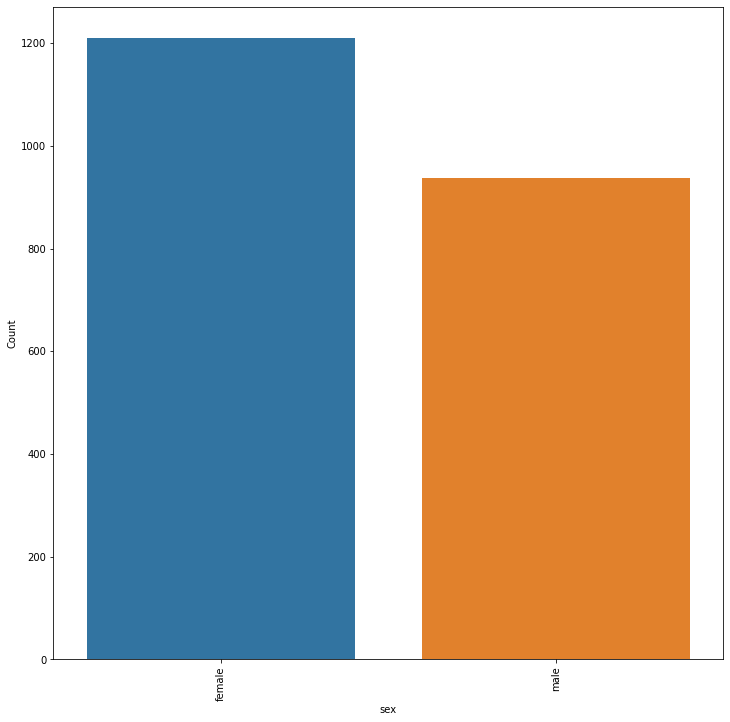

In [89]:
make_bar(PatientInfo, 'sex', 'patient_id')

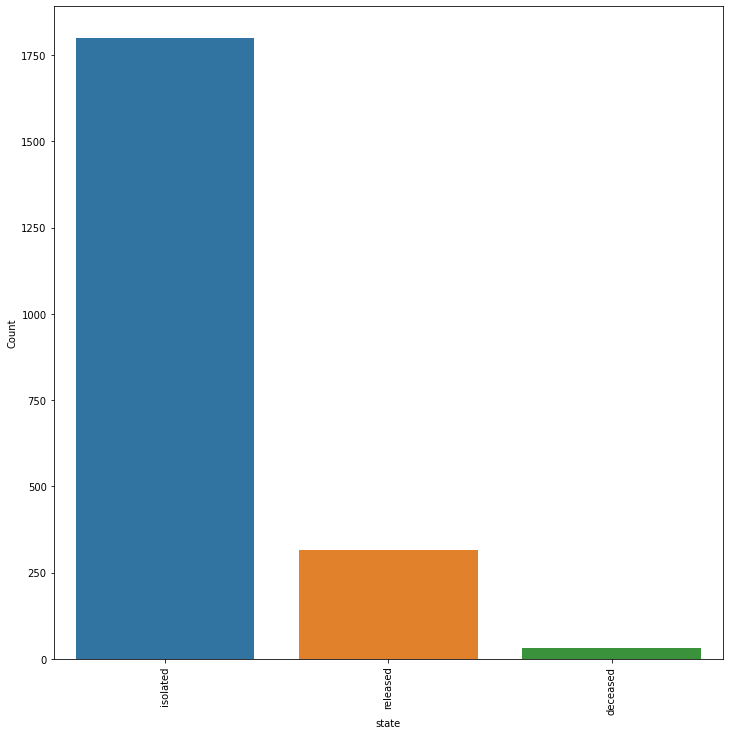

In [90]:
make_bar(PatientInfo, 'state', 'patient_id')

In [94]:
states = pd.DataFrame(PatientInfo["state"].value_counts())
states["status"] = states.index
states.rename(columns={"state" : "count"}, inplace = True)

fig = px.pie(states,
             values = "count",
             names = "status",
             title = "Current state of patients",
             template = "seaborn")
fig.update_traces(rotation = 90, pull = 0.05, textinfo = "value+percent+label")

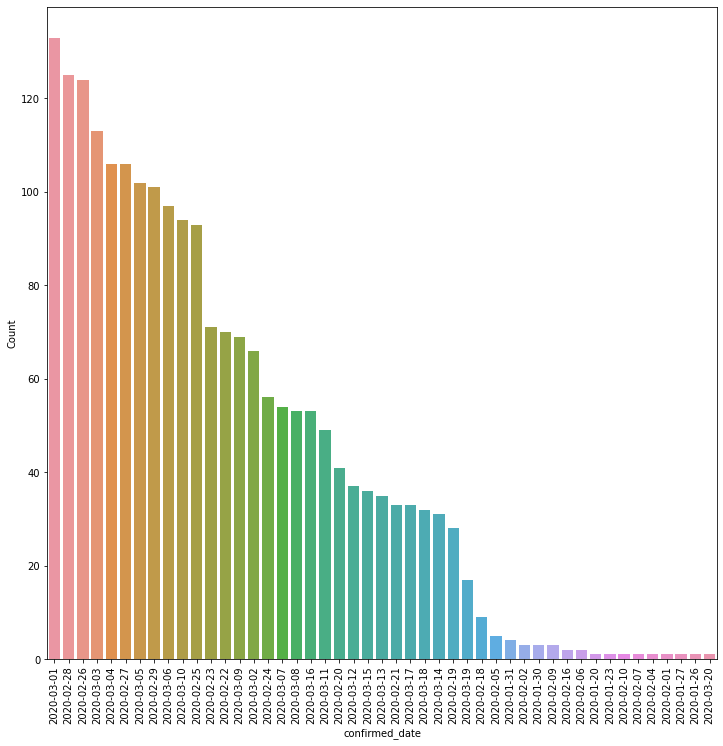

In [92]:
make_bar(PatientInfo, 'confirmed_date', 'patient_id')

Text(0.5, 1.0, 'Cummulated Confirmed Count')

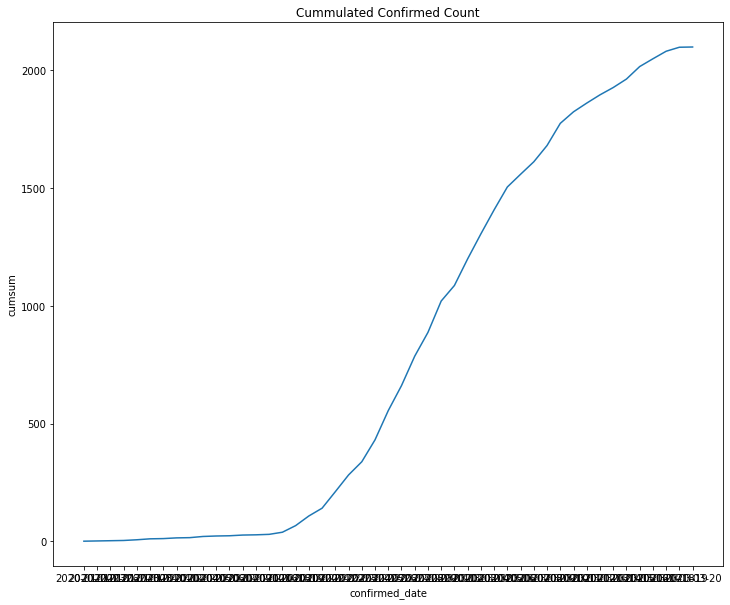

In [133]:
df = PatientInfo.groupby('confirmed_date')['patient_id'].count().reset_index()

df['cumsum'] = 0
for i in range(df.shape[0]):
    if i == 0:
        df['cumsum'][i] = 1
    else:
        df['cumsum'][i] = df['cumsum'][i-1] + df['patient_id'][i]

ax = plt.subplots(figsize = (12, 10))
g = sns.lineplot(df['confirmed_date'],
                 df['cumsum'])
plt.title('Cummulated Confirmed Count')

## PatientRoute

In [134]:
PatientRoute

,patient_id,global_num,date,province,city,latitude,longitude
0,1400000001,1,2020-01-19,Incheon,Jung-gu,37.460459,126.440680
1,1400000001,1,2020-01-20,Incheon,Seo-gu,37.478832,126.668558
2,1000000001,2,2020-01-22,Gyeonggi-do,Gimpo-si,37.562143,126.801884
3,1000000001,2,2020-01-23,Seoul,Jung-gu,37.567454,127.005627
4,2000000001,3,2020-01-20,Incheon,Jung-gu,37.460459,126.440680
...,...,...,...,...,...,...,...
170,1200000031,31,2020-02-09,Daegu,Nam-gu,35.839820,128.566600
171,1200000031,31,2020-02-15,Daegu,Dong-gu,35.882410,128.662100
172,1200000031,31,2020-02-16,Daegu,Nam-gu,35.839820,128.566600
173,1200000031,31,2020-02-17,Daegu,Suseong-gu,35.844730,128.612300


In [135]:
PatientRoute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
patient_id    175 non-null int64
global_num    175 non-null int64
date          175 non-null object
province      175 non-null object
city          175 non-null object
latitude      175 non-null float64
longitude     175 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 9.7+ KB


In [136]:
PatientRoute.isna().sum()

patient_id    0
global_num    0
date          0
province      0
city          0
latitude      0
longitude     0
dtype: int64

In [0]:
import folium
southkorea_map = folium.Map(location = [36.55, 126.983333 ], zoom_start = 7)

for lat, lon, num in zip(PatientRoute['latitude'], PatientRoute['longitude'], PatientRoute['city']):
    folium.CircleMarker([lat, lon], 
                        radius = 5,
                        color = 'red',
                        popup = ('Number of Confirmed patients : ' + str(num) + '<br>'),
                        fill_color = 'red',
                        fill_opacity = 0.7).add_to(southkorea_map)
southkorea_map